In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane','automobile','bird','cat','dear','dog','frog','horse','ship','truck']

170508288/170498071 [==============================] - 2s 0us/step


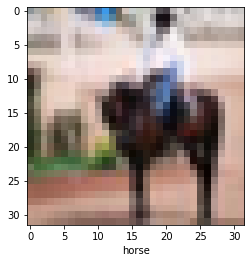

In [3]:
IMG_INDX = 11
plt.imshow(train_images[IMG_INDX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDX][0]])
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images,train_labels, epochs=20, validation_data=(test_images,test_labels))

Epoch 1/20
1563/1563 [==============================] - 18s 5ms/step - loss: 1.5270 - accuracy: 0.4425 - val_loss: 1.2969 - val_accuracy: 0.5367
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1489 - accuracy: 0.5938 - val_loss: 1.0416 - val_accuracy: 0.6325
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9939 - accuracy: 0.6514 - val_loss: 0.9927 - val_accuracy: 0.6465
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8961 - accuracy: 0.6837 - val_loss: 0.9431 - val_accuracy: 0.6676
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8287 - accuracy: 0.7099 - val_loss: 0.8622 - val_accuracy: 0.7041
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7655 - accuracy: 0.7337 - val_loss: 0.8543 - val_accuracy: 0.7046
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7245 - accuracy: 0.7463 - val_loss: 0.8746 - val_accuracy

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 1.1579 - accuracy: 0.7033 - 728ms/epoch - 2ms/step
0.7032999992370605
